# 그래프 신경망이란 무엇일까? (심화)

## 복습용 질문거리

## 강의소개
- 어텐션을 그래프 신경망에 적용하기
- 정점 임베딩에서 그래프 임베딩 얻기(그래프 풀링)
- 지나친 획일화(Over-Smoothing) 문제
- GraphSAGE 모델의 집계함수 직접 구현
- 어텐션 적용한 그래프 풀링으로 이때 일어날 수 있는 문제점?

## Further Question
- GraphSAGE 모델에서는 하나의 정점을 나타내기 위하여 집계 함수를 활용합니다. 이때, 자기 자신만의 임베딩 뿐 아니라 이웃 정점의 임베딩까지 사용합니다. 이러한 방식으로 정점을 정의하게 된다면, 어떠한 장점이 있을까요?

## 목차
1. 그래프 신경망 복습
2. 그래프 신경망에서의 어텐션
    - 특히 그래프 어텐션 신경망은 이웃 정점들의 임베딩을 평균내는 과정에서 가중치도 함께 학습함
3. 그래프 표현학습과 그래프 풀링
    - 정점 임베딩으로부터 그래프 풀링을 통해 전체 그래프 임베딩 가능
4. 지나친 획일화 문제
    - 그래프 층수 증가할때 정점 임베딩이 서로 유사해지고, 후속 과제 정확도 떨어짐
5. 그래프 데이터 증강
    - 그래프 데이터도 증강이 가능함, 정점간 유사도로 간선을 추가해서 신경망을 학습하면 정확도 향상 됨
6. 실습 : graphSAGE의 집계 함수 구현
7. '그래프를 위한 기계학습' 수업 복습

## 그래프 신경망 복습
---
### 1. 귀납식 정점 표현학습
- 정점을 임베딩 하는 함수
- 변환식과 구분됨
    - 임베딩을 얻는 것이 아니라 임베딩 함수 자체를 얻음
- 장점
    - 학습 이후 추가 정점 임베딩 얻기 가능
    - 임베딩을 미리 계산 저장 필요없음
    - 정점 속성 정보를 가진 경우 이를 활용 가능

### 2. 그래프 신경망 구조
- 이웃 정점들의 정보를 집계하는 과정을 반복하여 임베딩 얻음
    - 0번층 입력 정정 속성 정보 사용됨
    - 입력 받는 다음 층 부터는 가변적인 개수의 입력을 받음
        - 이웃 정보의 평균을 계산해서 아용
    - 집계 함수의 형태에 따라
        - 그래프 합성곱(더많이 공유 같은 가중치), 그래프 세이지는 더하는 대신 컨켓, agg에 다양한 옵션 적용 가능

### 3. 그래프 신경망 학습 
- 손실함수 정의 필요
    - 비지도 학습, 지도학습 모두 가능
    - 비지도
        - 정점간 거리를 보존 (거리말고도 인접성이나 경로 중첩 임의 보행 사용 가능)
    - 지도 학습
        - 종단종 학습 함

### 4. 그래프 신경망 활용
- 학습 안된 정점, 추가된 정점, 새로운 정점 활용 가능
- 모든 정점을 학습할 필요없이 일부로 학습해도 효과가 나옴

## 그래프 신경망에서의 어텐션
---
### 1. 기본 그래프 신경망의 한계
- 동일한 가중치로 이웃들의 정보를 평균냄
- 셀프 어텐션으로 가중치를 학습함 
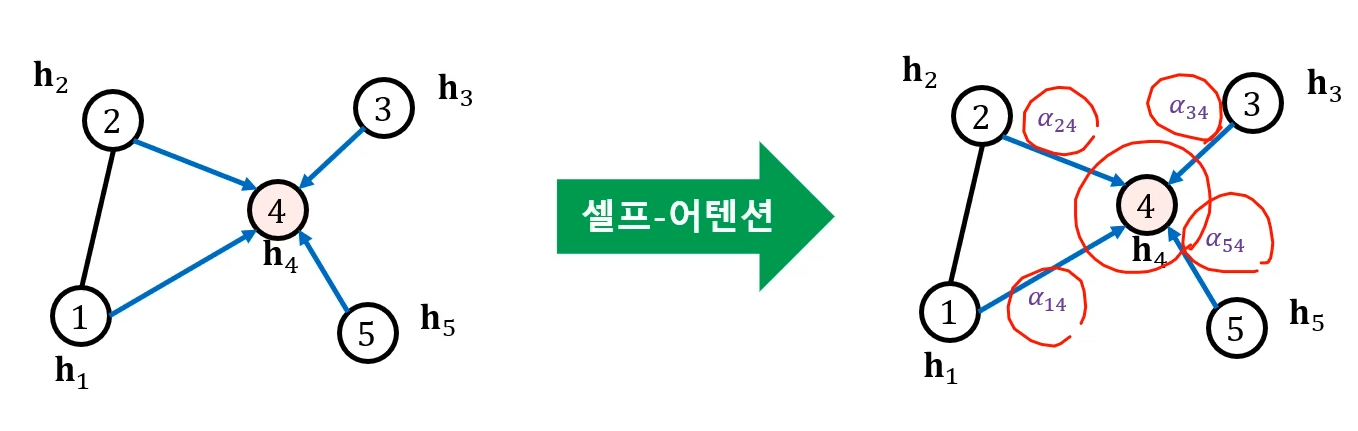
- 가중치 계산 방법
    - 정점 i로 부터 이웃 j로의 가중치 aij는 세 단계를 통해 계산함
        1. 해당 층의 정점 i의 임베딩 hi에 신경망 W를 곱해 새로운 임베딩을 얻음
        2. 정점 i와 정점 j의 새로운 임베딩을 연결한 후, 어텐션 계수 a를 내적함  
           여기서 a는 도은 정점이 공유하는 학습 변수!
        3. 2의 결과에 소프트 맥스 적용
        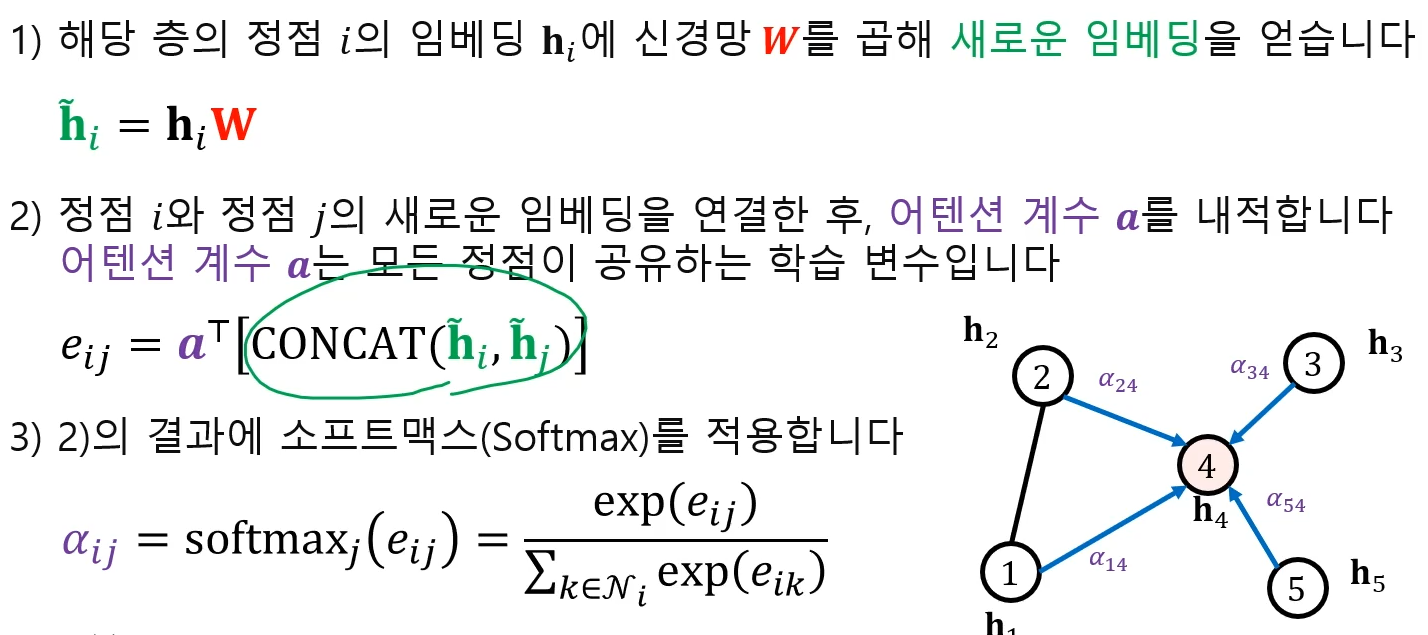

### 2. 그래프 어텐션 신경망 (GAT)
- 여러개의 어텐션을 동시에 학습해서 결과를 연결해 사용
    - 멀티해드 어텐션(Multi-head Attention)
    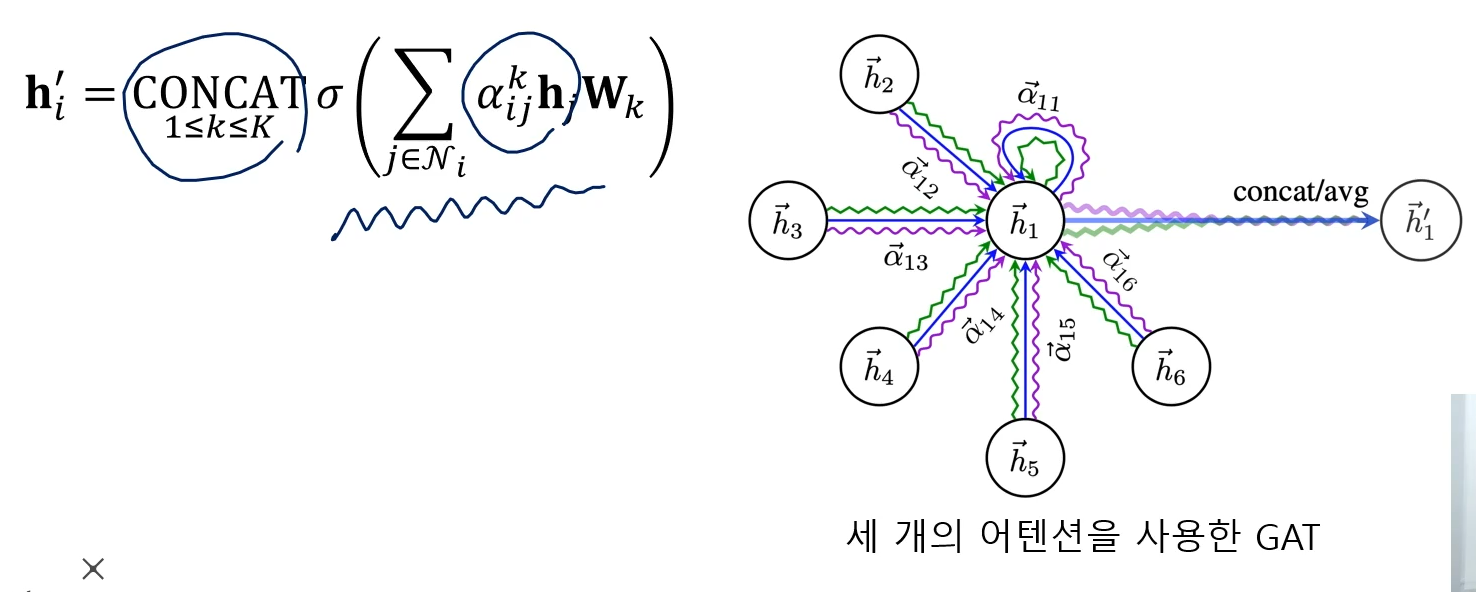
- 정점 분류 정확도 비교
    - GCN 보다 GAT가 정확도가 올라감
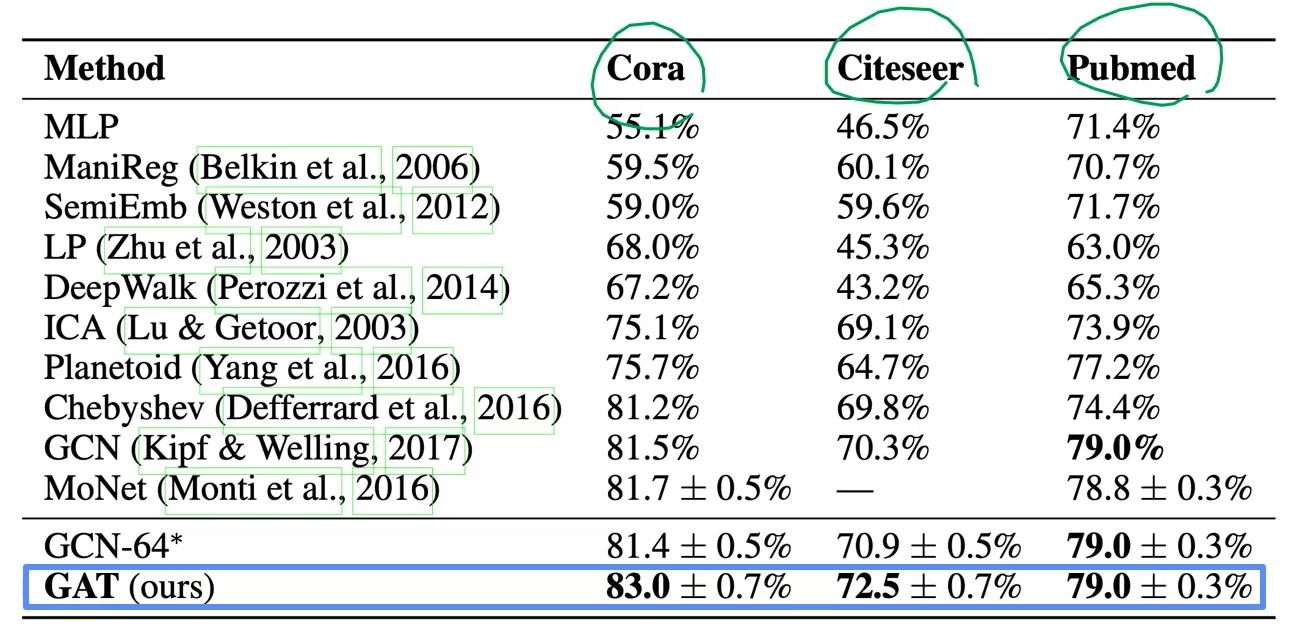

## 그래프 표현학습과 그래프 풀링
---
### 1. 그래프 표현 학습
- 정점을 표현하는게 아니라 그래프 전체를 벡터의 형태로 표현하는 것 (정점 임베딩이랑 차이남)
- 그래프 분류 등에 활용됨

### 2. 그래프 풀링
- 정점 임베딩으로 부터 그래프 임베딩을 얻는 과정임
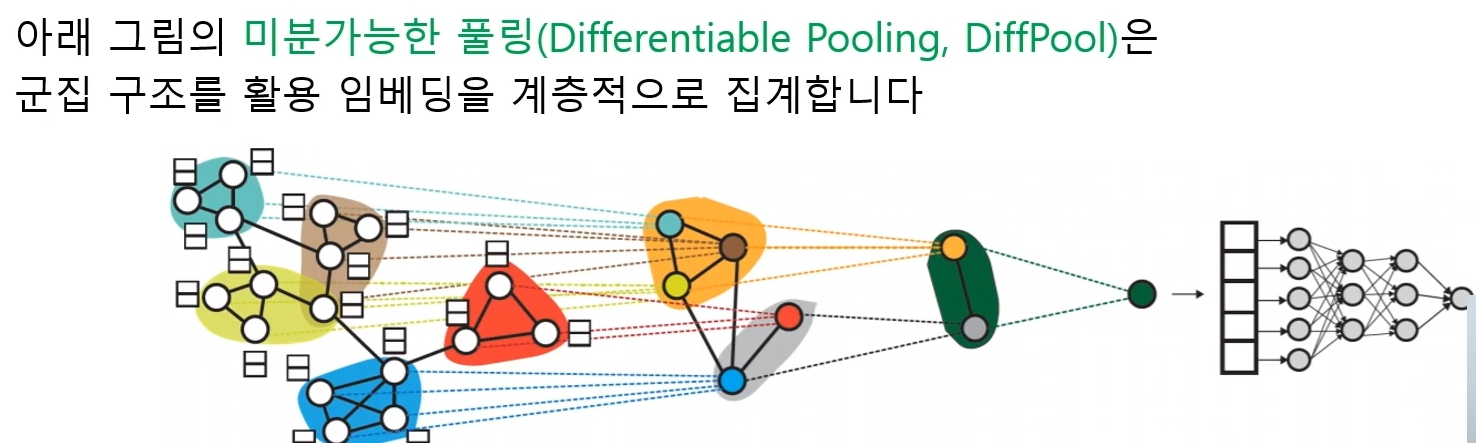

## 지나친 획일화 문제
---
### 1. 지나친 획일화 문제
- 그래프 신경망의 층의 수가 증가하면서 정점의 임베딩이 서로 유사해지는 현상
    - 작은 세상 효과와 관련있음
        - Layer5 즉 대부분 이어지게 되어서 비슷한 임베딩을 얻게되고 분류를 잘 못하게 됨
    - 그래프 신경망 층을 늘리면 성능 떨어짐
    - 그래서 residual을 넣어주는 방법이 있긴 하지만 제한적임(더 성능이 올라가지는 않음)
    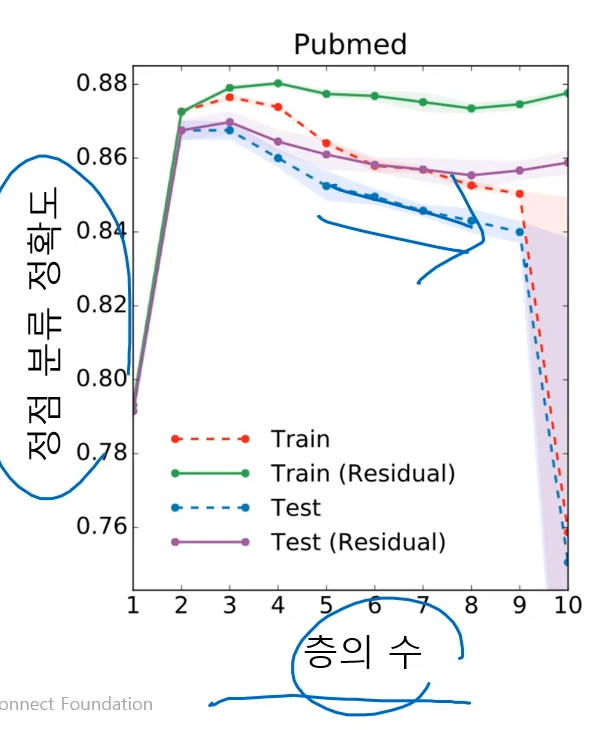
    
### 2. 지나친 획일화 문제에 대한 해결
- JK 네트워크 (Jumping Knowledge Network)
    - 마지막층의 임베딩만 넣는 것이 아니라 모든 층의 임베딩을 함께 사용함
    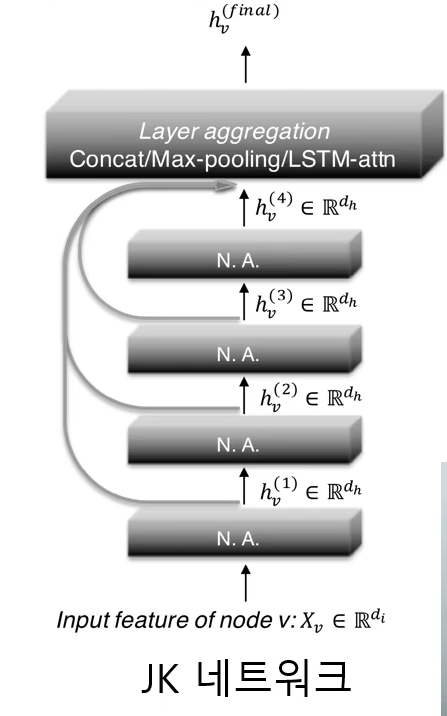
- APPNP는 
    - 0번째 층을 제외하고는 신경망 없이 집계함수를 넣음 (집계함수 단순화)
    - 층의 수 증가에 따른 정확도 감소가 없는것 확인함
    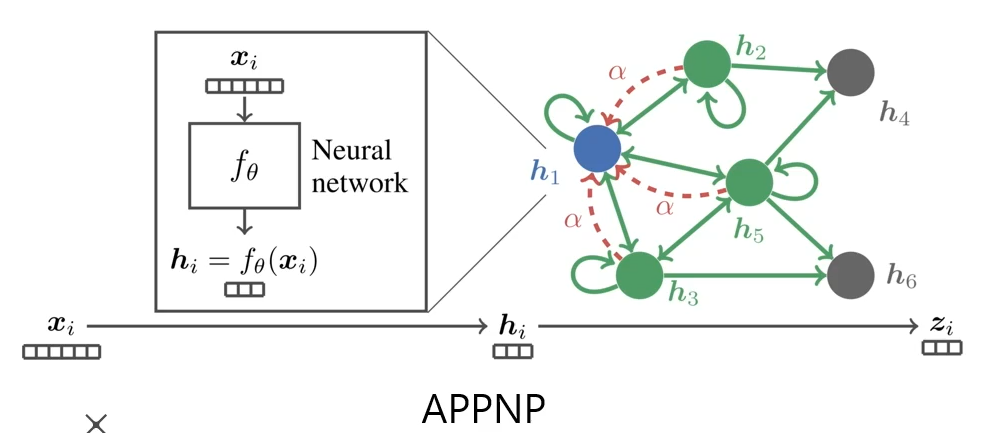
    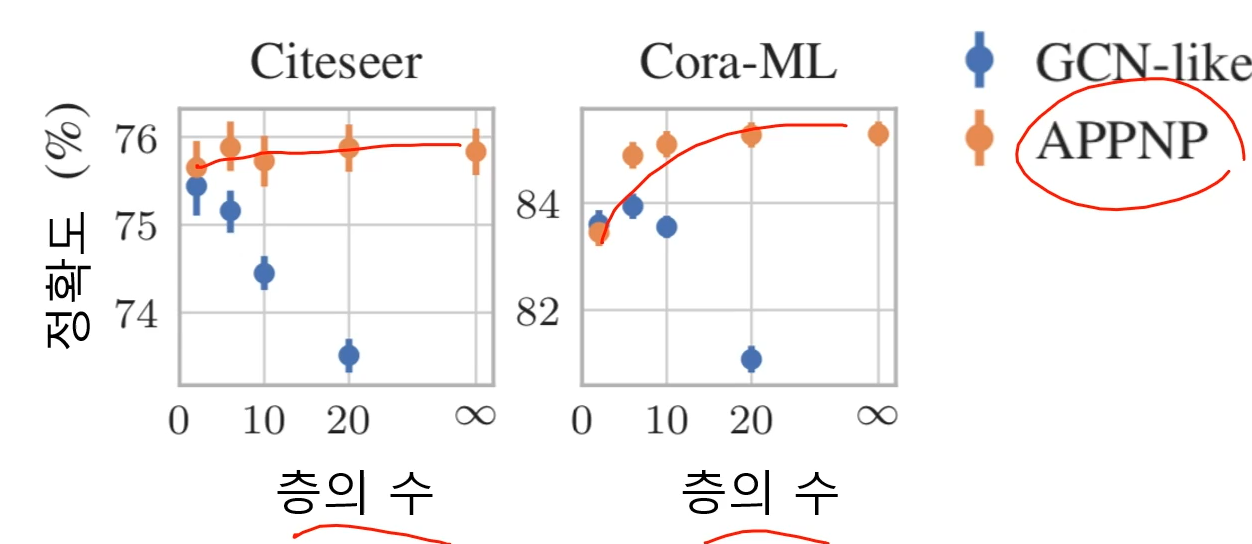


## 그래프 데이터의 증강
---
### 1. 그래프 데이터 증강 (Data Augmentation)
- 데이터 증강은 다양한 기계학습 문제에서 효과적 (특히 이미지)
- 방법?
    - 임의 보행 동해 정점간 유사도 높으면 간선 추가하는 것
    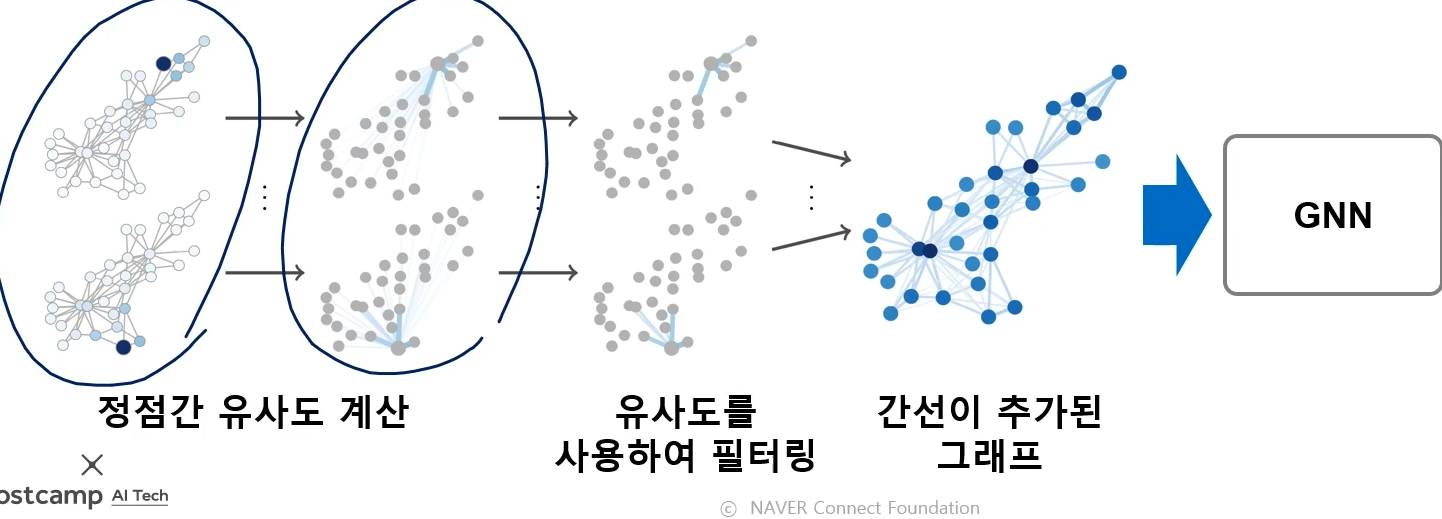

### 2. 그래프 데이터 증강에 따른 효과
- 정점 분류 정확도가 증가함
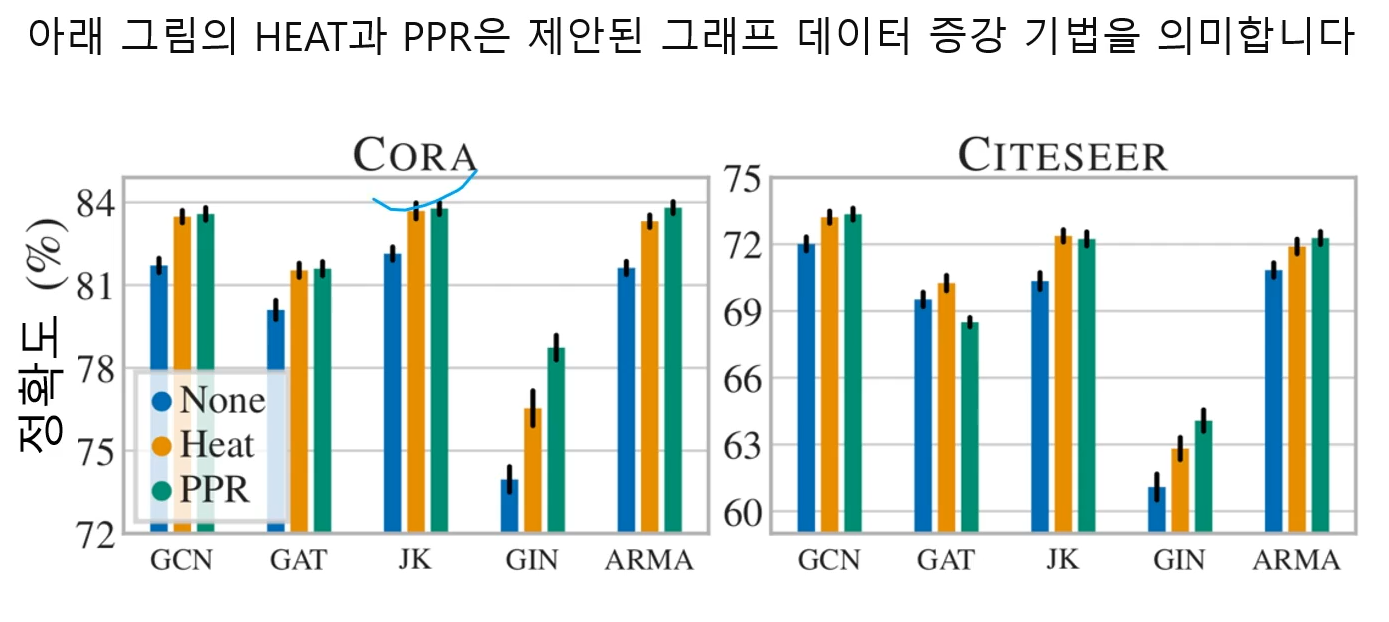